<a href="https://colab.research.google.com/github/IagoMagalhaes23/Machine-Learning-com-Frameworks/blob/main/Classificador_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Algoritmo KNN para classificação - KNearest Neighbors

##Importação da bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

##Carregando a base de dados através do Sklearn

In [2]:
wine = datasets.load_wine()

##Lendo a base de dados com o Pandas

In [3]:
# Criando o DataFrame
df_wine = pd.DataFrame(data=wine.data,columns=wine.feature_names)
# Criando a coluna com os valores da variável target.
df_wine['class'] = wine.target

df_wine.head().T

,0,1,2,3,4
alcohol,14.23,13.20,13.16,14.37,13.24
malic_acid,1.71,1.78,2.36,1.95,2.59
ash,2.43,2.14,2.67,2.50,2.87
alcalinity_of_ash,15.60,11.20,18.60,16.80,21.00
magnesium,127.00,100.00,101.00,113.00,118.00
total_phenols,2.80,2.65,2.80,3.85,2.80
flavanoids,3.06,2.76,3.24,3.49,2.69
nonflavanoid_phenols,0.28,0.26,0.30,0.24,0.39
proanthocyanins,2.29,1.28,2.81,2.18,1.82
color_intensity,5.64,4.38,5.68,7.80,4.32


##Verificando informações da base de dados

In [4]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [5]:
df_wine['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

##Separando os dados de treino e teste

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_wine.drop('class',axis=1), df_wine['class'], test_size=0.3)

##Alguns parâmetros interessantes:
n_neighbors: Número de vizinhos (default = 5), é o parâmetro K que vimos na parte de funcionamento do algoritmo.

Weights: Peso de amostras vizinhas (default = uniform).

metric: Métrica utilizada para o cálculo de distância (default = minkowski), temos outras métricas como a distância Hamming, Manhattan e a Markowski.

p: Parâmetro de poder para a métrica (default = 2), essa valor varia de acordo com a métrica de distância escolhida.

n_jobs: Número de jobs paralelos para executar no momento da busca de vizinhos (default = 1). Com esse parâmetro podemos definir quantas cpu queremos usar para fazer o processo de predição.

##Criando modelo e treinando modelo

In [7]:
# Definindo o número de vizinhos.
knn = KNeighborsClassifier(n_neighbors=3) #O número de vizinhos é o número de classes

knn.fit(X_train, y_train) #Realiza o treinamento do modelo

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

##Realizando predições

In [8]:
resultado = knn.predict(X_test)
resultado

array([1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 0, 0, 0, 1,
       1, 1, 2, 1, 1, 0, 2, 2, 1, 0])

##Plotando matriz de confusão

In [9]:
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0        20   0   0   20
1         1  17   3   21
2         2   2   9   13
All      23  19  12   54


##Plotando métricas de avaliações

In [10]:
print(metrics.classification_report(y_test,resultado,target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       0.87      1.00      0.93        20
     class_1       0.89      0.81      0.85        21
     class_2       0.75      0.69      0.72        13

    accuracy                           0.85        54
   macro avg       0.84      0.83      0.83        54
weighted avg       0.85      0.85      0.85        54



##Otimizando o parâmetro k utilizando o GridSearch

Melhores parametros {'n_neighbors': 1} com o valor de acurácia 0.7250793650793651 


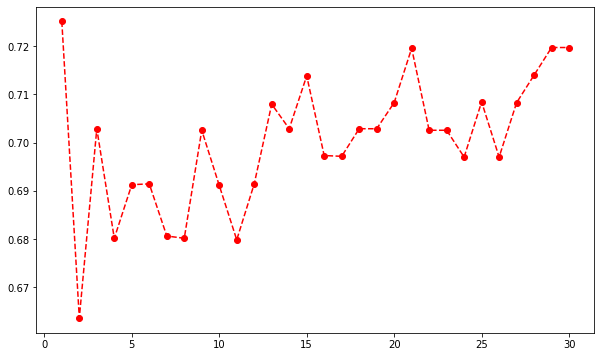

In [11]:
# Definindo a lista de valores.
k_list = list(range(1,31))

# Colocamos os valores em um dicionário
parametros = dict(n_neighbors=k_list)

grid = GridSearchCV(knn, parametros, cv=5, scoring='accuracy')

grid.fit(df_wine.drop('class',axis=1),df_wine['class'])

print("Melhores parametros {} com o valor de acurácia {} ".format(grid.best_params_,grid.best_score_))

scores = grid.cv_results_
#print(type(scores))
#print(scores.items)
set_dados = scores.setdefault('mean_test_score')
#set_dados
#print(scores.mean_test_score)
plt.figure(figsize=(10,6))
plt.plot(k_list, set_dados, color='red', linestyle='dashed', marker='o')